In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import iirnotch, filtfilt
from scipy.fft import fft, fftfreq

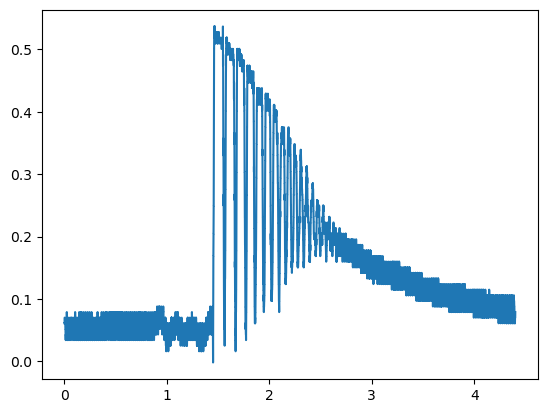

In [3]:
data = pd.read_csv("/Users/a21130/Downloads/Messungen/Messungen mit Barium bei Raumtemperatur/Messung 5 mit d = 10cm und m2.txt",
                   delimiter=';', decimal=",", skiprows=2)

# Kommata durch Punkte ersetzen und die Spalten in float konvertieren
#data = data.replace(',', '.', regex=True).astype(float)

# Umwandeln in ein numpy array
data_np = data.values
plt.plot(data_np[:,0],data_np[:,1])

In [4]:
#Daten komprimieren
for i in range(len(data_np) - 2, -1, -1):
    if data_np[i, 1] == data_np[i + 1, 1]:
        data_np = np.delete(data_np, i, axis=0)

68
1624


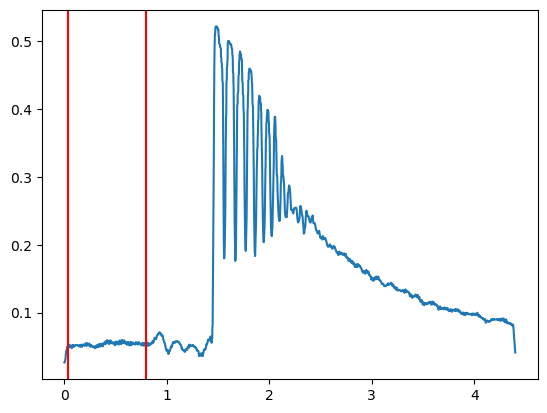

In [22]:
#moving average
window_size = 100

moving_avg = np.convolve(data_np[:,1], np.ones(window_size)/window_size, mode='same')
plt.plot(data_np[:,0],moving_avg)

#Zeichne Linien um Bereich zu finden, der bei Null sein sollte
plt.axvline(x = 0.04, color = 'red')
plt.axvline(x = 0.8, color = 'red')

for i in range(len(data_np[:,0])):
    if data_np[i,0]>=0.04:
        print(i)
        break
for i in range(len(data_np[:,0])):
    if data_np[i,0]>=0.8:
        print(i)
        break


In [23]:
#schieben des plots auf Null und berechne Ergebnis über maximale Auslenkung

res = np.max(moving_avg)-np.mean(moving_avg[68:1600])
print(res)

0.46853097140835503


In [24]:
#berechne Fehler des moving average
def moving_average_error(data, window_size):
    n = len(data)
    standard_errors = np.zeros(n - window_size + 1)
    for i in range(n - window_size + 1):
        window_data = data[i:i + window_size]
        standard_errors[i] = np.std(window_data) / np.sqrt(window_size)
    return standard_errors

moving_avg_err = moving_average_error(data_np, window_size)
print(np.mean(moving_avg_err))

0.10216622823076506


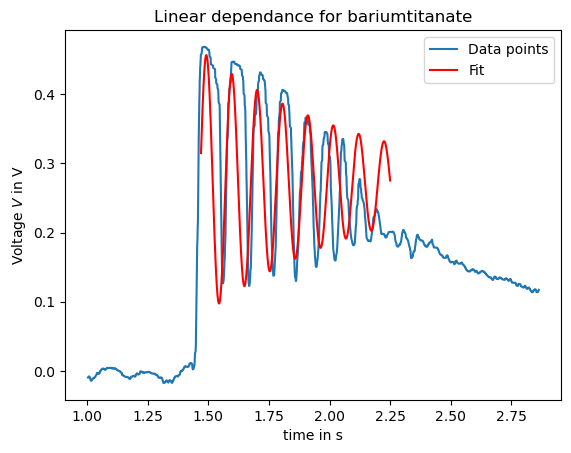

In [129]:
#Versuch plot manuell zu fitten
plt.plot(data_np[2000:6000,0],moving_avg[2000:6000]-np.mean(moving_avg[68:1600]),label = "Data points")
plt.plot(np.linspace(1.47,2.25,1000),np.exp(-1.5*np.linspace(1.47,2.25,1000))*1.75*np.sin(60*np.linspace(1.47,2.25,1000))+0.27, label="Fit",color ='red')
plt.xlabel('time in s')
plt.ylabel('voltage in V')
plt.legend()
plt.title('exponential fit for barium titanate with F = 256.4 $\pm$ ')
plt.show()